In [72]:
import numpy as np
import matplotlib.pyplot as plt
%pip install graphviz
from graphviz import Digraph
import math

Note: you may need to restart the kernel to use updated packages.


In [2]:
def f(x):
    return x**2-4*x+5

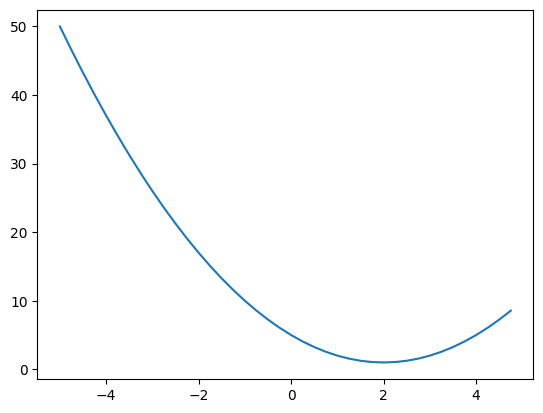

In [3]:
x=np.arange(-5,5,0.25)
y=f(x)
plt.plot(x,y)

In [4]:
h=0.1
y=f(3)
y2=f(3+h)
(y2-y)/h

2.1000000000000085

In [5]:
a=2
b=-3
c=10
h=0.001
def func(a,b,c):
 return a*b+c
d= func(a,b,c)
d
d1=func(a,b,c+h)
print(d)
print(d1)
(d1-d)/h

4
4.0009999999999994


0.9999999999994458

In [70]:
#Visualization



def trace(root):
    nodes,edges=set(),set()

    def build(v):
        if v not in nodes:
            nodes.add(v)
            for c in v._prev:
                edges.add((c,v))
                build(c)
    build(root)
    return nodes,edges

def draw(root):
    dot=Digraph(format='svg',graph_attr={'rankdir':'LR'})
    nodes,edges=trace(root)
    for n in nodes:
        uid=str(id(n))
        dot.node(name=uid,label=f'{n.label} | data {n.data} | grad: {n.grad}',shape='record')
        if n.op:
            dot.node(name=uid+n.op,label=n.op)
            dot.edge(uid+n.op,uid)
    for n1,n2 in edges:
        dot.edge(str(id(n1)),str(id(n2))+n2.op)

    return dot






In [195]:
class Value:
    def __init__(self,data,children=(),op='',label=''):
        self.data=data
        self._prev=set(children)
        self.op=op
        self.back= lambda :None
        self.label=label
        self.grad=0.0

    def __repr__(self):
        return f"Value(data:{self.data})"
    


    def __add__(self,other):
        other= other if isinstance(other,Value) else Value(other)
        out=Value(self.data+other.data,(self,other),'+')
        def back():
            self.grad+=1.0*out.grad
            other.grad+=1.0*out.grad
        out.back=back
        return out
    


    def __sub__(self,other):
        other= other if isinstance(other,Value) else Value(other)
        out= Value(self.data-other.data,(self,other),'-')
        return out
    
    def __mul__(self,other):
        other= other if isinstance(other,Value) else Value(other)
     
        out= Value(self.data*other.data,(self,other),'*')
        def back():
            self.grad+=other.data*out.grad
            other.grad+=self.data*out.grad
        out.back=back
        return out
    


    def __rmul__(self,other):
        return self*other
    

    def exp(self):
        x=self.data
        out=Value(math.exp(x),(self,),'exp')
        def back():
            self.grad+=out.data*out.grad
        out.back=back

        
    def tanh(self):
        n=self.data
        tanh=((math.exp(2*n)-1)/(math.exp(2*n)+1))
        out=Value(tanh,(self,),'tanh')
        def back():
            self.grad+=(1-(tanh**2))*out.grad

       
        out.back=back
        return out

        

  

In [196]:
x1=Value(2.0,label='x1')
x2=Value(0.0,label='x2')
w1=Value(-3.0,label='w1')
w2=Value(1.0,label='w1')
b=Value(6.8888,label='b')
x1w1=x1*w1
x1w1.label='x1w1'
x2w2=x2*w2
x2w2.label='x2w2'
x1w1x2w2=x1w1+x2w2
x1w1x2w2.label="x1w1+x2w2"
n=x1w1x2w2+b
n.label='n'
o=n.tanh()
o.label='o'
o.grad


0.0

In [197]:
4*x2

Value(data:0.0)

In [198]:
# #Manual BackPropagation!!!!
o.grad=1.0
# n.grad=1-(o.data**2)
# b.grad=n.grad
# x1w1x2w2.grad=n.grad
# x1w1.grad=x1w1x2w2.grad
# x2w2.grad=x1w1x2w2.grad
# x1.grad=x1w1.grad*w1.data
# x2.grad=x2w2.grad*w2.data
# w1.grad=x1w1.grad*x1.data
# w2.grad=x2w2.grad*x2.data

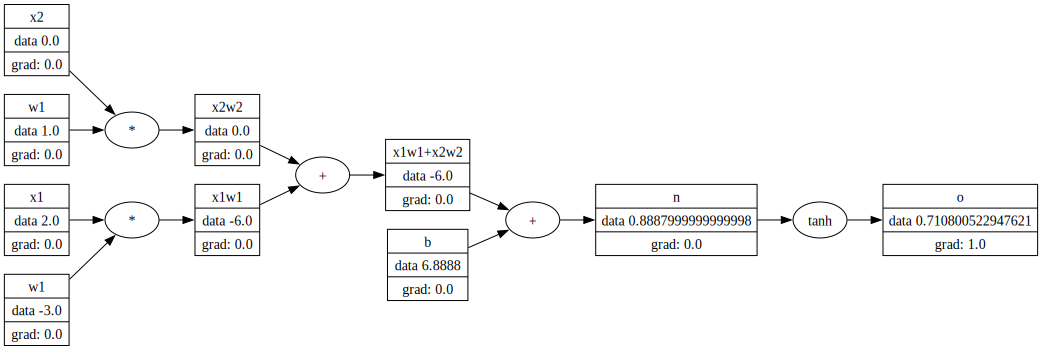

In [199]:
draw(o)